# Assignment 2 - Advanced Python
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Krista Miller

# Question 1 - Caesar Cipher

### 5 points

A cipher is an algorithm used for encrypting and decrypting messages. This is a key idea in the field of cryptography, which is basically the study of hidden messages. The idea is that we want to communicate with someone by sending a message, but we don't want any third parties to be able to read the message. Ciphers make it so that only the sender and receiver can read the message.

There are many types of ciphers, but among the simplest is one called the [Caesar Cipher](https://en.wikipedia.org/wiki/Caesar_cipher), which was supposedly used by Julius Caesar with a shift value of 3. The "shift value" refers to how the message's characters are manipulated. The Caesar Cipher is a simple example of a substitution cipher, where each character in the message is replaced by some other character. Here, each character is "shifted" by some value to be replaced by the character that many spaces over in the alphabet.

Run the code below to see a diagram illustrating this idea with a shift value of 2.

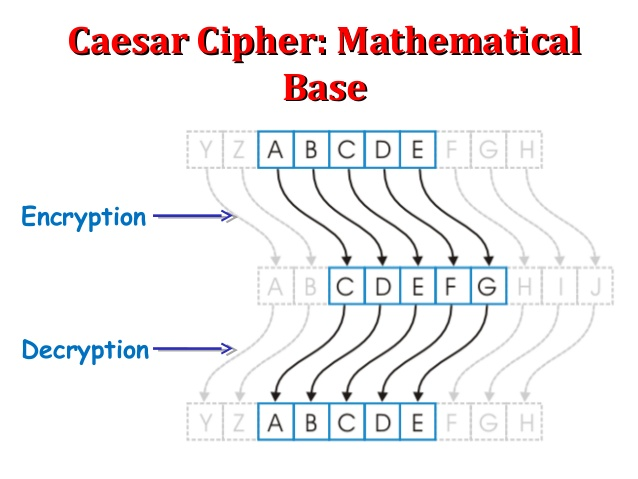

In [1]:
from IPython import display 
display.Image("https://4.bp.blogspot.com/-lhTbszCWwVw/WSPPPA3heVI/AAAAAAAAA8I/MDwB9zjGGJcfECLxThU68CC6mKz5Peu_gCLcB/s1600/caesar-cipher-4-638.jpg")

Define a class called CaesarCipher. The constructor should take the shift value as a parameter and store it as an instance variable. (The classical example is a shift value of 3. Shift values can be any integer, positive or negative, though realistically only values between -26 and 26 make sense when using the English alphabet.)

Define the methods `encrypt` and `decrypt`, which should take a string as a parameter and produce an encrypted message and decrypted message, respectively, given the input string. In cryptography terms, the original message is referred to as "plaintext" and the encrypted message is referred to as "ciphertext".

**We will assume a message will be provided in lowercase letters with a single space separating each word.** For example:

    yo there are free sandwiches in the third floor kitchen

Although not strictly necessary for this question, it helps if you understand what character encodings are, perhaps the most well-known being [ASCII](https://www.ascii-code.com/). The idea is that computers have an easy means of representing numerical values by using binary units. For the computer to know how to represent characters, we simply assign each character a number. Lowercase letters in ASCII start at 97, so `'a'=97`, `'b'=98`, and so on.

Hints:
* Remember the modulo operator `%` returns the remainder after dividing two integers. This is useful for "wrapping around" the alphabet. For example, shifting the character `z` by positive 3 should result in `c`, which is at the start of the alphabet.
* `ord(char)` returns the character encoding number for `char`.
* `chr(number)` returns the character represented by `number`.
* `str.join(lst)` returns a string where each element in the list is used as a string and concatenated together with `str` as the delimiter. For example, `"..".join(['a', 'b', 'c'])` returns `'a..b..c'`.

**Test your program** by encrypting the message "there is a quiz tomorrow" with a shift value of 3 and printing the result, which should be "wkhuh lv d txlc wrpruurz". Decrypt the encrypted message to ensure that your decryption works as well.

*If you want an extra challenge (meaning this is totally optional), define a helper function (a private function that is intended to be used only be other methods in this class) that performs either an encryption or decryption depending on the value passed into a parameter. `encrypt` and `decrypt` can then call the helper function instead of both functions having nearly the exact same code.*



In [2]:
# YOUR CODE HERE

class CaesarCipher:

    # Constructor: takes the shift value as a parameter and stores it as an instance variable
    def __init__(self, shift):
        self.shift = shift
    
    # Instance method to encrypt:
    def encrypt(self, plaintext):
        encryption_str = ''
        for i in plaintext:
            if i.isupper():
                temp = 65 + ((ord(i) - 65 + self.shift) % 26) 
            elif i.islower():
                temp = 97 + ((ord(i) - 97 + self.shift) % 26)
                encryption_str = encryption_str + chr(temp)
            else:
                encryption_str = encryption_str + i
        return(encryption_str)
    
    # Instance method to decrypt:
    def decrypt(self, plaintext):
        decryption_str = ''
        for i in plaintext:
            if i.isupper():
                temp = 65 + ((ord(i) - 65 + (26-self.shift)) % 26) 
            elif i.islower():
                temp = 97 + ((ord(i) - 97 + (26-self.shift)) % 26)
                decryption_str = decryption_str + chr(temp)
            else:
                decryption_str = decryption_str + i       
        return(decryption_str)

### test ###

secret_message= CaesarCipher(3)
print(secret_message.encrypt('there is a quiz tomorrow'))
print(secret_message.decrypt('wkhuh lv d txlc wrpruurz'))

wkhuh lv d txlc wrpruurz
there is a quiz tomorrow


# Question 2 - Nations Data

This question is divided into multiple parts. Answer the questions in order and only use the provided code cell below each question to do so.

### (a) 3 Points

Create a class called Nation to represent a single nation. Your class should have the following attributes:

*   Four instance variables: `country`, `continent`, `population` and `land_area`, all stored as strings
*   A class variable `_num_instances` to keep track of how many Nation object instances have been created
*   A constructor (`__init__`) that sets all four instance variable using to the given parameters and increments `_num_instances` by one.
  *   Remember class variables are accessed in a non-class method by prepending `self.__class__.` before the name of the class variable.
* A class method `num_instances` to return the value of `_num_instances`.
* `__str__` defined to return a string representation of a Nation comprised of the values of the instance variables.
* A method `population_density` that computes the population density of the nation (population / land area).
  * Note that the instance variables are strings and must be converted to floats to perform this calculation.



In [3]:
# YOUR CODE HERE

class Nation:
    #Class method to return the value of _num_instances
    _num_instances = 0
    
    
    def __init__(self, country, continent, population, land_area):
        self.country = country
        self.continent = continent
        self.population = population
        self.land_area = land_area
        
        #increment:
        Nation._num_instances +=1
        
    def __str__(self):
        return f"{self.country},{self.continent},{self.population},{self.land_area}"
        
        # Instance method to calculate population_density:
    def population_density(self):
        return((float(self.population)*1000000)/float(self.land_area))
    

Test your Nation class by manually creating an instance called `usa` with country `"United States"`, continent `"North America"`, population `"318.9"`, and land area `"3794066"`. Print the variable `usa` to observe the string representation given by `__str__`. Print the population density and number of instances as well.

In [4]:
# YOUR CODE HERE

### test ###

#instance of Nation class:
usa= Nation("United States", "North America", "318.9", "3794066")

print(usa)
print(usa.population_density())
print (Nation._num_instances)

United States,North America,318.9,3794066
84.05230694458136
1


### (b) 2 points

Define a method called `process_file` that reads the .csv file as a list of lists, then converts that list of lists into a dictionary. The keys in the dictionary will be country names and the values are instances of Nation that represent that country. `process_file` should then return that dictionary.

If you are using Google Colab, there are a few ways to get your local files into your colab, but the simplest is to upload the .csv file to your colab. On the left-hand side of the colab UI you should see a folder symbol. Clicking on that symbol will open up the Files tab with a default folder called `sample_data` (which you can ignore). Simply drag and drop the .csv for this assignment to the root Files directory alongside `sample_data`, or use the Upload button to select the file. If the .csv file is called `nations.csv`, the path in Google Colab is therefore `/content/nations.csv`.

Regardless of your Notebook editor, the `path` variable in the provided code below should be the path to wherever your .csv file is. Change this to match your directory structure as necessary. You may use this code directly in your code cell to read the file in as a list of lists.

```python
path = "/content/nations.csv"
with open(path) as file:
  data = [line.rstrip("\n").split(",") for line in file.readlines()]
```

The each list has the information for a particular country in the order of country, continent, population, land area. Here are the first few entries of the list of lists:

```
[['Afghanistan', 'Asia', '31.8', '251772'],
 ['Albania', 'Europe', '3.0', '11100'],
 ['Algeria', 'Africa', '38.3', '919595'],
 ...
```

In [12]:
# YOUR CODE HERE

def process_file(data):
    nation_dict = dict()
    for nation in data:
        nation_dict[nation[0]] = Nation(nation[0], nation[1], nation[2], nation[3])
    return nation_dict

path = "nations.csv"
with open(path) as file:
    data = [line.rstrip("\n").split(",") for line in file.readlines()]


processed_data = process_file(data)

Test your `process_file` method by printing out the first 10 Nation instances stored in the dictionary. You should see your string representation for each nation.

In [83]:
# YOUR CODE HERE

### test ###

for idx, (k, v) in enumerate(processed_data.items()):
    if idx == 10: 
        break
    print(f'{k}: {v}')


Afghanistan: Afghanistan,Asia,31.8,251772
Albania: Albania,Europe,3.0,11100
Algeria: Algeria,Africa,38.3,919595
Andorra: Andorra,Europe,.085,181
Angola: Angola,Africa,19.1,481354
Antigua and Barbuda: Antigua and Barbuda,North America,.091,108
Argentina: Argentina,South America,44.0,1068302
Armenia: Armenia,Asia,3.1,11506
Australia: Australia,Australia/Oceania,22.5,2967909
Austria: Austria,Europe,8.2,32383


### (c) 2 points 
Define a function `list_countries` that takes a continent as a parameter and produces a list of countries that reside in that continent. Naturally, you should called your `process_file` method to first get the dictionary of info on each nation, then iterate over that dictionary to produce a list of countrie specific to the given continent.

*Optional: This function can be defined in just a couple lines if you use list comprehension.*

In [29]:
# YOUR CODE HERE
def list_countries(continent):
    nation_data = process_file(data)
    country_list = [nation.country for nation in nation_data.values() if continent == nation.continent]
    return country_list

Test your method by calling, say, `list_countries("South America")` (feel free to test out other continents). Your output should look something like:
```
['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Paraguay',
 'Peru',
 'Suriname',
 'Uruguay',
 'Venezuela']
```

In [30]:
# YOUR CODE HERE
list_countries("South America")

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Paraguay',
 'Peru',
 'Suriname',
 'Uruguay',
 'Venezuela']

### (d) 3 points

Again using your `process_file` method, iterate over the dictionary of nations to print the data in a tabular format. To keep the output short, print the information on, say, the first 15 nations stored in the dictionary. Format your output so the data is easily readable.

Your output should look something like:
```
Country Name        	Continent           	Population          	Land Area           
Afghanistan         	Asia                	31.8                	251772              
Albania             	Europe              	3.0                 	11100               
Algeria             	Africa              	38.3                	919595              
Andorra             	Europe              	.085                	181                 
Angola              	Africa              	19.1                	481354              
Antigua and Barbuda 	North America       	.091                	108                 
Argentina           	South America       	44.0                	1068302             
Armenia             	Asia                	3.1                 	11506               
Australia           	Australia/Oceania   	22.5                	2967909             
Austria             	Europe              	8.2                 	32383               
Azerbaijan          	Asia                	9.7                 	33436               
Bahamas             	North America       	.32                 	5358                
Bahrain             	Asia                	1.3                 	253                 
Bangladesh          	Asia                	166.3               	55599               
Barbados            	North America       	.29                 	167  
```

In [84]:

# YOUR CODE HERE

header= ['Country', 'Continent', 'Population', 'Land Area']
print("{:<25} {:<25} {:<25} {:<25}".format(*(header)))

for idx, (k, v) in enumerate(processed_data.items()):
    if idx == 15: break
    print("{:<25} {:<25} {:<25} {:<25}".format(v.country, v.continent, v.population, v.land_area))


Country                   Continent                 Population                Land Area                
Afghanistan               Asia                      31.8                      251772                   
Albania                   Europe                    3.0                       11100                    
Algeria                   Africa                    38.3                      919595                   
Andorra                   Europe                    .085                      181                      
Angola                    Africa                    19.1                      481354                   
Antigua and Barbuda       North America             .091                      108                      
Argentina                 South America             44.0                      1068302                  
Armenia                   Asia                      3.1                       11506                    
Australia                 Australia/Oceania         22.5        

### Create a class called Organism.  
The organism class should take in the kingdom and the weight of the organism.  It should have an init, weight and str method.  Now create a class dog that inherits from Organism.  The dog class should take kingdom, weight, name, species and color.  Finally, create a class Plant that inherits from Organism.  It should take as input kingdom, weight, species and color.  Dog and Plant should have methods to return the values as a string (__str__) and method to return species, color, etc.

In [77]:
# your code here

class Organism:
    
    def __init__(self, kingdom, weight):
        self.kingdom = kingdom
        self.weight = weight
    
    def __str__(self):
        return f"{self.kingdom}, {self.weight}"
        
class Dog(Organism):
    
    def __init__(self, kingdom, weight, name, species, color):
        super().__init__(kingdom, weight)
        self.name = name
        self.species = species
        self.color = color
        
    def __str__(self):
        return f"{self.name},{self.species},{self.color},{self.kingdom},{self.weight}"
    
class Plant(Organism):
    
    def __init__(self, kingdom, weight, species, color):
        super().__init__(kingdom, weight)
        self.species = species
        self.color = color
        
    def __str__(self):
        return f"{self.species},{self.color},{self.kingdom},{self.weight}"
    
# set the following instances
Missy = Dog('animalia', 55, 'Missy','German Shorthair','brown')
Iris = Plant('plantae',5,'Iris','white')

### test ###

print(Missy)
print(Iris)
print(Missy.weight)
print(Iris.color)


Missy,German Shorthair,brown,animalia,55
Iris, white,plantae,5
55
white
